<a href="https://colab.research.google.com/github/shahchayan9/CRISP-DM-SEMMA-AND-KDD/blob/main/CRISP_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the Walmart Store Sales dataset
file_path = '/content/sample_data/Walmart_Store_sales.csv'
walmart_data = pd.read_csv(file_path)

# Display the first few rows of the dataset and basic information
walmart_data_info = walmart_data.info()
walmart_data_head = walmart_data.head()

walmart_data_info, walmart_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


(None,
    Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
 0      1  05-02-2010    1643690.90             0        42.31       2.572   
 1      1  12-02-2010    1641957.44             1        38.51       2.548   
 2      1  19-02-2010    1611968.17             0        39.93       2.514   
 3      1  26-02-2010    1409727.59             0        46.63       2.561   
 4      1  05-03-2010    1554806.68             0        46.50       2.625   
 
           CPI  Unemployment  
 0  211.096358         8.106  
 1  211.242170         8.106  
 2  211.289143         8.106  
 3  211.319643         8.106  
 4  211.350143         8.106  )

In [ ]:
# Convert the 'Date' column to datetime format
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'], format='%d-%m-%Y')

# Check for outliers in 'Weekly_Sales' using summary statistics
walmart_data_description = walmart_data.describe()

walmart_data_description


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the features (X) and target (y)
X = walmart_data[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = walmart_data['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(316554511405.115, 0.01738312550370069)

In [ ]:
# Reimport necessary libraries and reload the dataset
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Reload the dataset
walmart_data = pd.read_csv(file_path)
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'], format='%d-%m-%Y')

# Feature engineering: extract 'month' and 'year' from 'Date'
walmart_data['Month'] = walmart_data['Date'].dt.month
walmart_data['Year'] = walmart_data['Date'].dt.year

# Updated feature set (including 'Month' and 'Year')
X = walmart_data[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year']]
y = walmart_data['Weekly_Sales']

# Split the data into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test data
y_rf_pred = rf_model.predict(X_test)

# Evaluate the model: MSE, MAE, and R2 Score
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

rf_mse, rf_mae, rf_r2


(289698026296.0537, 385017.4891359771, 0.10074834225794782)

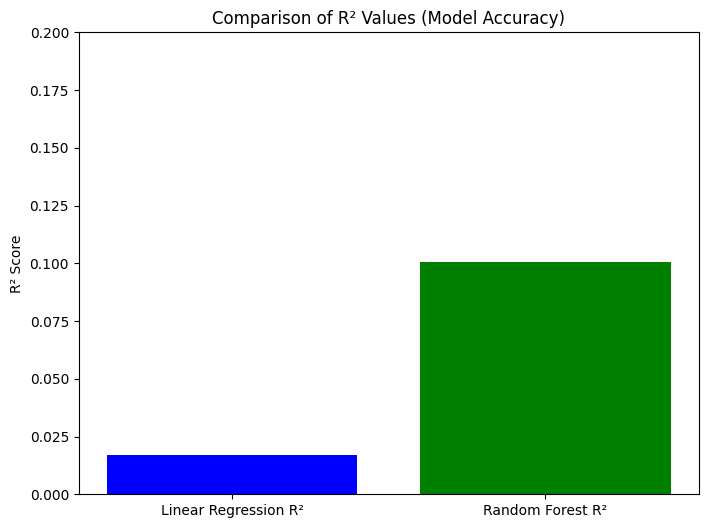

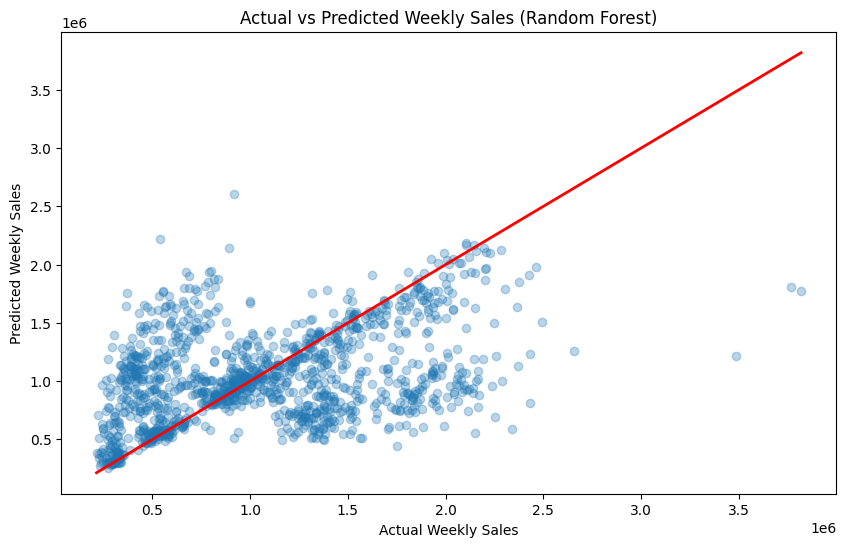

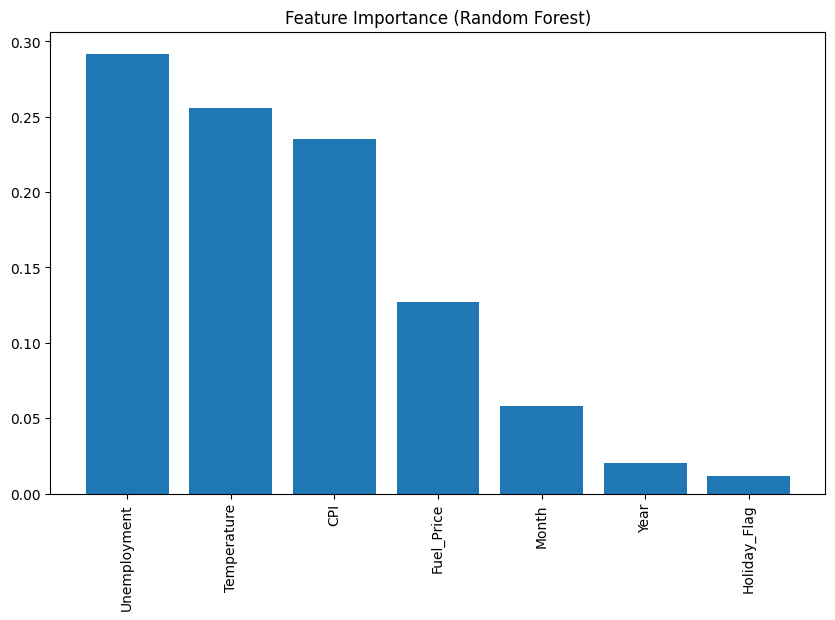

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate accuracy for both models
# For regression models, R² is often used as a measure of accuracy
linear_regression_r2 = 0.017  # from the linear regression result
random_forest_r2 = rf_r2

# Comparison of R² values (accuracy)
accuracy_comparison = {
    'Linear Regression R²': linear_regression_r2,
    'Random Forest R²': random_forest_r2
}

# Create a bar chart for comparison of accuracies
models = list(accuracy_comparison.keys())
scores = list(accuracy_comparison.values())

plt.figure(figsize=(8, 6))
plt.bar(models, scores, color=['blue', 'green'])
plt.title('Comparison of R² Values (Model Accuracy)')
plt.ylabel('R² Score')
plt.ylim(0, 0.2)
plt.show()

# Plot actual vs predicted values for Random Forest Model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_rf_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Perfect prediction line
plt.title('Actual vs Predicted Weekly Sales (Random Forest)')
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.show()

# Plot feature importances from the Random Forest model
importances = rf_model.feature_importances_
feature_names = X.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.title('Feature Importance (Random Forest)')
plt.show()


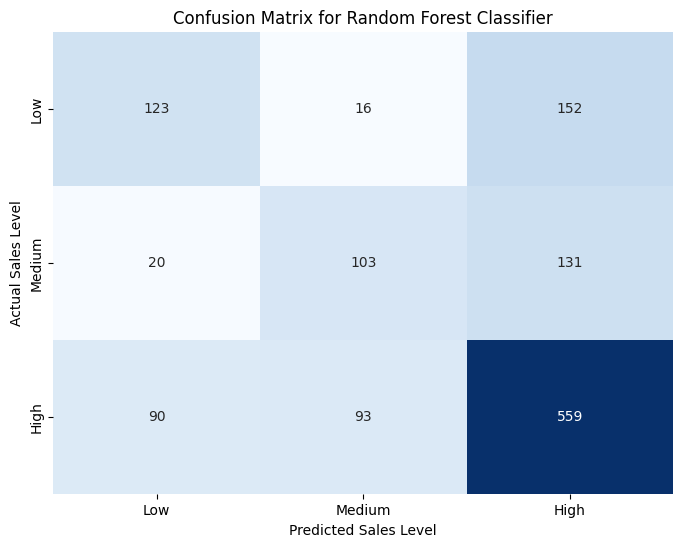

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Convert weekly sales into categories (Low, Medium, High)
# Define thresholds based on percentiles
sales_labels = pd.cut(y, bins=[-1, 500000, 1500000, np.inf], labels=['Low', 'Medium', 'High'])

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, sales_labels, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_class, y_train_class)

# Predict on the test data
y_pred_class = rf_classifier.predict(X_test_class)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

conf_matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming `conf_matrix` is already generated
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Sales Level')
plt.ylabel('Actual Sales Level')
plt.show()



In [ ]:
from sklearn.metrics import classification_report

# Generate classification report for precision, recall, and F1-score
class_report = classification_report(y_test_class, y_pred_class, target_names=['Low', 'Medium', 'High'])

class_report


'              precision    recall  f1-score   support\n\n         Low       0.53      0.42      0.47       291\n      Medium       0.49      0.41      0.44       254\n        High       0.66      0.75      0.71       742\n\n    accuracy                           0.61      1287\n   macro avg       0.56      0.53      0.54      1287\nweighted avg       0.60      0.61      0.60      1287\n'